# Example : noise_macro

This notebook provides an example noise spectrum for the macroscopic experiment, as well as common parameters. 

In [1]:
from math import *
import os, sys
sys.path.append(os.getcwd() + '\..\src')
from quantumnoise import *

## 1. Voltage PSD

The PSD function for voltage noise on the macroscopic experiment is provided in the source code, and can be accessed with :
```python
v_noise_macro(w)
```
where w is the angular frequency. 

We first define a noise source by passing a noise PSD function to the Source() class :

In [2]:
v_noise_source = Source(v_noise_macro)

The noise PSD can then be viewed :

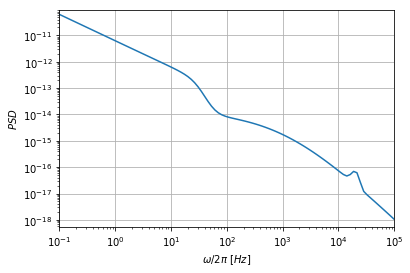

In [3]:
v_noise_source.show()

## 2. Lifetime, Dephasing time and Decoherence Time

For every noise spectrum, we can compute a lifetime $T_1$, a dephasing time $T_\phi$, and a decoherence time $T_2$. We'll start by computing the lifetime. A particular type of noise has an associated coupling strength for lifetimes and dephasing times. Some noise sources won't cause any lifetime decay, others no dephasing decay, and some will cause both simultaneous decays. Voltage noise will cause both lifetime and dephasing time decay. 

We must first calculate the corresponding lifetime and dephasing coupling strengths, here denoted by Dx and Dz respectively :

In [4]:
dzB = 23 # Magnetic field gradient
v = 2*pi*250e3 # Secular frequency
d = 310e-6 # Distance to electrode 
eta = 0.046 # Geometric factor

v_Dx = voltage_Dx(dzB, v, d, eta)
v_Dz = voltage_Dz(dzB, v, d, eta)

The voltage source noise previously defined can be updated with the new coupling strengths :

In [5]:
v_noise_source.Dx = v_Dx
v_noise_source.Dz = v_Dz

A noise process is defined by a list of all noise sources. In this case, there is only the voltage noise. We define a noise process by calling the Noise() class. 

In [6]:
my_noise = Noise([v_noise_source])

The relevent times can now be found :

In [12]:
Omw = 2*pi*15e3
N = 1

T1 = my_noise.T1(Omw)
Tphi = my_noise.Tphi(Omw, N)
T2 = my_noise.T2(Omw, N)

print('T1 : ' + str(T1) + '\nTphi : ' + str(Tphi) + '\nT2 : ' + str(T2))

T1 : 0.7069062746657805
Tphi : 0.9039895529629977
T2 : 0.6524542262507087


In the above example, Omw corresponds to the dressed state splitting, and N is the number of refocussing pulses. 

## 3. Decay functions

A qubit will decohere over time, and its fidelity, ie. integry of information, will deteriorate. There are two scenarios: when the qubit is idle and when it is evolving due to an external field (for example during a gate). The corresponding decay functions are :
```python
fdecay(t, Omw, N)
fdecayrabi(t, OmR, Omw)
```
Here, Omw denotes the dressed state splitting, N the number of refocusing pulses, and OmR the power of the gate field. 

Let us assume that we perform a two qubit gate, with a single refocusing pulse, and a dressed state splitting of $2\pi 15$ kHz. If the gate time is 3ms, the fidelity will be :


In [8]:
my_noise.fdecay(3e-3, 2*pi*15e3, 1)

0.9979523629190578

The fidelity of a single qubit gate which lasts 1 ms is : 

In [9]:
my_noise.fdecayrabi(1e-3, 1/(2*pi*1e-3), 2*pi*15e3)

0.9989759981039207

## 4. Multiple noise sources

Up to now, only voltage noise was considered. Other sources such as current noise on CCWs and ambient magnetic field noise can cause decoherence. Let us define a new noise source corresponding to ambient magnetic field noise which we'll simply model as white noise. Since the noise PSD is magnetic field noise, the couplings Dx and Dz can be set to 1.

In [10]:
def ambient_B(w) :
    return 1e-24 # B field noise is 1 pT^2/Hz

ambient_B_source = Source(ambient_B, 1, 1)

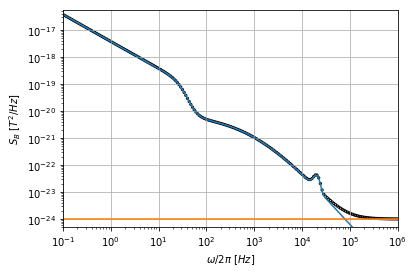

In [11]:
my_noise = Noise([v_noise_source, ambient_B_source])

my_noise.show()